In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

oecd_bli = pd.read_csv("datasets/lifesat/oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv("datasets/lifesat/gdp_per_capita.csv", thousands=',', delimiter='\t',
                            encoding='latin1', na_values='n/a')

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [3]:
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

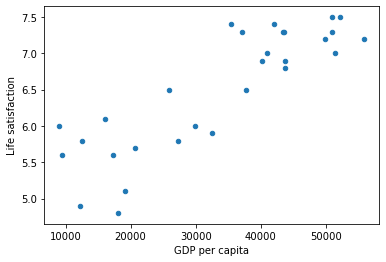

In [4]:
%matplotlib inline
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

In [5]:
model = LinearRegression()
model.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
model.predict([[22587]])

array([[5.96242338]])

In [7]:
model.coef_

array([[4.91154459e-05]])

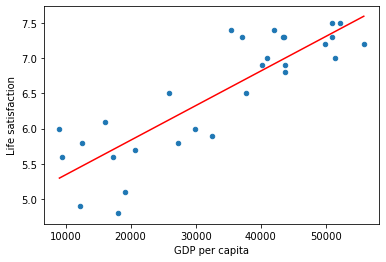

In [8]:
%matplotlib inline
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
x=np.arange(country_stats['GDP per capita'].min(),country_stats['GDP per capita'].max(),0.1)
y = model.coef_[0]*x + model.intercept_
plt.plot(x,y,'r-')
plt.show()